## By: Aditya Mittal
### Prediction using Supervised ML
### Task 1

### TSF  GRIP JUNE21

Dataset URL:"http://bit.ly/w-data"

### Importing Required Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Exploring and Understanding our dataset

In [18]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head() #to see first 5 rows of data.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
data.shape #to find the shape of data

(25, 2)

i.e. we have 25 entries and 2 columns, the first column is Hours (Independent Variable) and Score (Depending Variable)

In [20]:
data.describe() #data description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
 data.info()  #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 
 
 ### Visualising our data

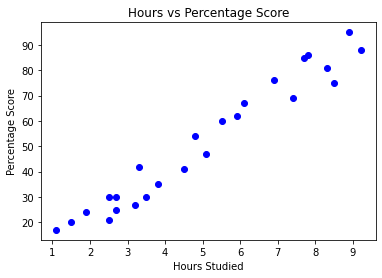

In [22]:
# Plotting the distribution of scores

x = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
plt.plot(x,y,'bo')  

plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [23]:
data.corr() #corr() is used to find the pairwise correlation of all columns in the dataframe

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
# Splitting the Dataset into 80:20 ( 80% data for Training and 20% data for testing)

In [25]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


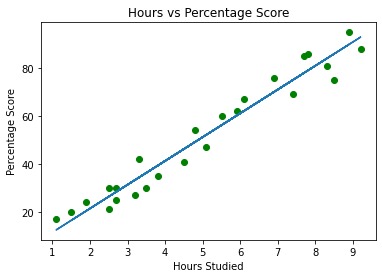

In [26]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y,color='green')
plt.plot(x, line);
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [ ]:
print("Training Score: ",reg.score(x_train,y_train)*100)

### Making Predictions
Now that we have trained our algorithm with good score, it's time to make some predictions.

In [27]:
y_pred=reg.predict(x_test)
print("Predicted Values of our Testing data is : ")
y_pred

Predicted Values of our Testing data is : 


array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

##### Comparing Actual Data and Predicated Data

In [28]:
#Comparing the actual y_test set and predicted y_pred data we get
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,Predicted,Difference/Error
14,17,12.442587,4.557413
0,21,26.359448,-5.359448
17,24,20.395079,3.604921
6,88,92.961570,-4.961570
23,76,70.098155,5.901845


##### Model Evaluation

In [29]:
# mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.877039354964483


In [30]:
# mean_squared_error ( MSE Value)
print("Mean Squared Error ( MSE Value) :",mean_squared_error(y_test, y_pred))

Mean Squared Error ( MSE Value) : 24.387620339856632


In [31]:
# mean_squared_error ( RMSE Value)
print("Mean Squared Error ( RMSE Value) :",mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error ( RMSE Value) : 4.938382360637604


In [32]:
#R2_Score
print("Prediction Score : ", r2_score(y_test, y_pred))

Prediction Score :  0.9735538080811826


### What will be predicted score if a student studies for 9.25 hrs/ day?
So well answer is :

In [33]:

hours = [[9.25]]
pred = reg.predict(hours)
print("Score obtained by the student if he studies for 9.25 hours/day is : ",pred[0])

Score obtained by the student if he studies for 9.25 hours/day is :  93.45860055685802
